<a href="https://colab.research.google.com/github/chamsi-web-dev/BuildCnn/blob/master/ex5%266%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#EXERCIE 5


#coding:utf-8

import tensorflow as tf
#print(tf.__version__)
#switch tf to tf.compat.v1

#1-for csv file, we must use this format of numbers
# 0.76 instead of 0,76
# and this for all rows

#2- use tf.compat.v1.train instead of tf fue to version of tensorflow
filename_queue = tf.compat.v1.train.string_input_producer(["/content/tf_read.csv"]) #Read existing data.
reader = tf.compat.v1.TextLineReader()

key, value = reader.read(filename_queue)

record_defaults = [[1.], [1.], [1.], [1.]]
col1, col2, col3, col4 = tf.compat.v1.decode_csv(value, record_defaults=record_defaults)

features = tf.compat.v1.stack([col1, col2, col3])
init_op = tf.compat.v1.global_variables_initializer()
local_init_op = tf.compat.v1.local_variables_initializer()

with tf.compat.v1.Session() as sess:
  sess.run(init_op)
  sess.run(local_init_op)
  coord = tf.compat.v1.train.Coordinator()
  threads = tf.compat.v1.train.start_queue_runners(coord=coord)
  for i in range(30):
    example, label = sess.run([features, col4])
    print(example)
    print('Done !!!')
  coord.request_stop()
  print('all threads are asked to stop!')
  coord.join(threads)
  print('all threads are stopped!')

[ 0.88 20.35 -0.18]
Done !!!
[-0.25  3.99 -0.01]
Done !!!
[-0.87 26.25 -0.23]
Done !!!
[-1.03  2.87 -0.03]
Done !!!
[-0.51  7.81 -0.04]
Done !!!
[-1.57 14.46 -0.23]
Done !!!
[-1.000e-01  1.002e+01 -1.000e-02]
Done !!!
[-0.56  8.92 -0.05]
Done !!!
[-1.2   4.1  -0.05]
Done !!!
[-0.77  5.15 -0.04]
Done !!!
[-0.88  4.48 -0.04]
Done !!!
[-2.7  10.82 -0.3 ]
Done !!!
[-1.23  2.4  -0.03]
Done !!!
[-0.77  5.16 -0.04]
Done !!!
[-0.76 15.67 -0.12]
Done !!!
[-0.81  6.15 -0.05]
Done !!!
[-0.6   5.01 -0.03]
Done !!!
[-1.25  4.75 -0.06]
Done !!!
[-2.53  7.31 -0.19]
Done !!!
[-1.15 16.39 -0.19]
Done !!!
[-1.7   5.19 -0.09]
Done !!!
[-0.62  3.23 -0.02]
Done !!!
[-0.74 17.43 -0.13]
Done !!!
[-0.77 15.41 -0.12]
Done !!!
[ 0. 47.  0.]
Done !!!
[0.25 3.98 0.01]
Done !!!
[-1.1   9.01 -0.1 ]
Done !!!
[-1.02  3.87 -0.04]
Done !!!
[ 0.88 20.35 -0.18]
Done !!!
[-0.25  3.99 -0.01]
Done !!!
all threads are asked to stop!
all threads are stopped!


Epoch: 1 cost= 0.85690546 W= [0.44618517] b= [-0.02582441]
Epoch: 1 cost= 0.8362038 W= [0.47123864] b= [-0.05139444]
Epoch: 1 cost= 0.82073724 W= [0.49163607] b= [-0.07265072]
Epoch: 1 cost= 0.801393 W= [0.5200036] b= [-0.10284841]
Epoch: 1 cost= 0.78913605 W= [0.540365] b= [-0.12499981]
Epoch: 1 cost= 0.7799119 W= [0.55759853] b= [-0.14416972]
Epoch: 1 cost= 0.7752391 W= [0.5672866] b= [-0.15519412]
Epoch: 1 cost= 0.7689925 W= [0.58178234] b= [-0.17207736]
Epoch: 1 cost= 0.7612619 W= [0.6035226] b= [-0.19800851]
Epoch: 1 cost= 0.75669557 W= [0.6203173] b= [-0.21853536]
Epoch: 1 cost= 0.75392807 W= [0.63430995] b= [-0.23607047]
Epoch: 1 cost= 0.7523832 W= [0.64633083] b= [-0.2515259]
Epoch: 1 cost= 0.7517447 W= [0.6565114] b= [-0.26496428]
Epoch: 1 cost= 0.7517066 W= [0.6618666] b= [-0.27222678]
Epoch: 1 cost= 0.7523313 W= [0.6732141] b= [-0.28804934]
Epoch: 1 cost= 0.7525558 W= [0.6752001] b= [-0.29089886]
Epoch: 1 cost= 0.7528708 W= [0.6772708] b= [-0.2939586]
Epoch: 1 cost= 0.753745

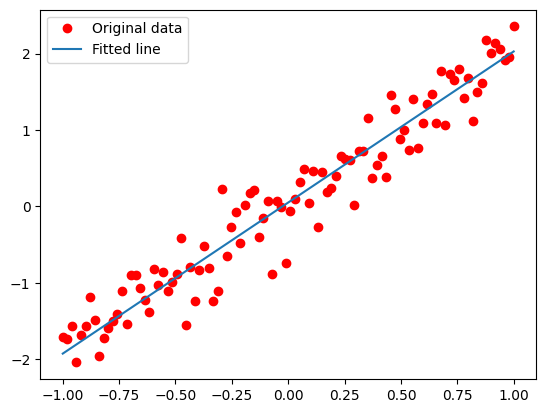

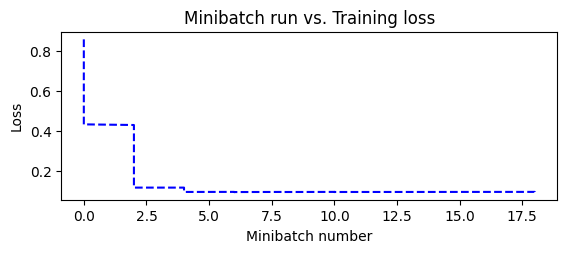

x=0.2, z= [0.44587636]


In [125]:
#Exercie 5

# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

plotdata = { "batchsize":[], "loss":[] }
#switch tf to tf.compat.v1
tf = tf.compat.v1
def moving_average(a, w=10):
 if len(a) < w:
    return a[:]
 return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

 # Generate analog data.
train_X = np.linspace(-1, 1, 100)
train_Y = 2*train_X + np.random.randn(*train_X.shape)*0.3 # y=2x, but some noise is added.

#Display the graph.
# plt.plot(train_X, train_Y, 'ro', label='Original data')
# plt.legend()
plt.show()
tf.reset_default_graph()

#Create a model.
#Placeholders
X = tf.placeholder("float")
Y = tf.placeholder("float")
#Model parameters
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

#A forward structure
z = tf.multiply(X, W)+ b
tf.summary.histogram('z',z)#Display predicted values in a histogram.

#Reverse optimization
cost =tf.reduce_mean( tf.square(Y - z))
tf.summary.scalar('loss_function', cost)#Show the loss by scalars.
learning_rate = 0.01
#Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize variables.
init = tf.global_variables_initializer()
#Set parameters.
training_epochs = 20
display_step = 2


#Start a session.
with tf.Session() as sess:
  sess.run(init)
  #Merge all summaries.
  merged_summary_op = tf.summary.merge_all()
  #Create summary writer for file writing
  summary_writer = tf.summary.FileWriter('log/mnist_with_summaries',sess.graph)
#Write data to the model.
  for epoch in range(training_epochs):
      for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})
        #Generate a summary.
        summary_str = sess.run(merged_summary_op,feed_dict={X: x, Y: y});
        summary_writer.add_summary(summary_str, epoch);#Write summary to files.
        #Display all detailed information of training.
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
              plotdata["batchsize"].append(epoch)
              plotdata["loss"].append(loss)
      print (" Finished!")
      print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W),"b=", sess.run(b))
  print ("cost:",cost.eval({X: train_X, Y: train_Y}))


  #Visualized results:
  plt.plot(train_X, train_Y, 'ro', label='Original data')
  plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
  plt.legend()
  plt.show()
  plotdata["avgloss"] = moving_average(plotdata["loss"])
  plt.figure(1)
  plt.subplot(211)
  plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
  plt.xlabel('Minibatch number')
  plt.ylabel('Loss')
  plt.title('Minibatch run vs. Training loss')
  plt.show()
  #Test on model results:
  print("x=0.2, z=", sess.run(z, feed_dict={X: 0.2}))


# Nouvelle section

In [153]:
#EXERCIE 8.2

# -*- coding: utf-8 -*-
#!/usr/bin/env python
import tensorflow as tf
import os

#switch tf to tf.compat.v1
tf = tf.compat.v1

#add github repository
#source: https://www.youtube.com/watch?v=CH8uW3abI9A
git clone https://github.com/tensorflow/tensorflow


#Import the mnist database.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Define an input variable.
x = tf.placeholder(tf.float32, [None, 784])
#Define parameters.
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
#Define an excitation function.
y = tf.nn.softmax(tf.matmul(x, W) + b)
#Define an output variable.
y_ = tf.placeholder(tf.float32, [None, 10])
#Define a cost function.
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#Define an optimization function.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

#Initialize variables.

init = tf.global_variables_initializer()
#Define a session.
sess = tf.Session()


#Initialize a session.
sess.run(init)
#Define the saver of the model.
saver = tf.train.Saver()
#Perform 1,000 rounds of training.
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_:batch_ys})
print("Training finished!")

#Create a saving directory for the model.
model_dir = "mnist_model"
model_name = "ckp"
if not os.path.exists(model_dir):
  os.mkdir(model_dir)


#Save the model.
saver.save(sess, os.path.join(model_dir, model_name))
print("The model is saved!")

SyntaxError: ignored